# **Algerian_Forest_EDA**

Dataset Link: https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

In [1]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

In [2]:
df = pd.read_csv("/content/Algerian_forest_fires_dataset_UPDATE.csv",skiprows=[0])
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.shape

(246, 14)

In [4]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

**Stripping unnecessary space from column name**

In [8]:
df.columns = df.columns.str.strip()

In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [10]:
backup = df.copy()

## **Data Preprocessing**

### **Handling Each and Every Feature Individual**

**1. Handling Day Feature**

In [11]:
df["day"].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31',
       'Sidi-Bel Abbes Region Dataset', 'day'], dtype=object)

In [12]:
# displaying Only Numeric data
df = df[df["day"].str.isnumeric()]

In [13]:
df["day"] = df["day"].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int64 
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: int64(1), object(13)
memory usage: 28.6+ KB


**2. Handling Month Feature**

In [15]:
df["month"].unique()

array(['06', '07', '08', '09'], dtype=object)

In [16]:
df = df[df["month"].str.isnumeric()]

In [17]:
df["month"] = df["month"].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int64 
 1   month        244 non-null    int64 
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: int64(2), object(12)
memory usage: 28.6+ KB


**3. Handling Year Feature**

In [19]:
df["year"].unique()

array(['2012'], dtype=object)

In [20]:
df = df[df["year"].str.isnumeric()]

In [21]:
df["year"] = df["year"].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int64 
 1   month        244 non-null    int64 
 2   year         244 non-null    int64 
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: int64(3), object(11)
memory usage: 28.6+ KB


**4. Handling Temperature Feature**

In [23]:
df["Temperature"].unique()

array(['29', '26', '25', '27', '31', '33', '30', '28', '32', '34', '35',
       '36', '37', '22', '24', '38', '39', '40', '42'], dtype=object)

In [24]:
df = df[df["Temperature"].str.isnumeric()]

In [25]:
df["Temperature"] = df["Temperature"].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int64 
 1   month        244 non-null    int64 
 2   year         244 non-null    int64 
 3   Temperature  244 non-null    int64 
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: int64(4), object(10)
memory usage: 28.6+ KB


**5. Handling RH Feature**

In [27]:
df["RH"].unique()

array(['57', '61', '82', '89', '77', '67', '54', '73', '88', '79', '65',
       '81', '84', '78', '80', '55', '62', '66', '64', '53', '47', '50',
       '68', '75', '76', '63', '69', '70', '59', '48', '45', '60', '51',
       '52', '58', '86', '74', '71', '49', '44', '41', '42', '90', '87',
       '72', '46', '37', '36', '56', '43', '83', '29', '34', '33', '35',
       '39', '31', '21', '40', '24', '38', '26'], dtype=object)

In [28]:
df = df[df["RH"].str.isnumeric()]

In [29]:
df["RH"] = df["RH"].astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int64 
 1   month        244 non-null    int64 
 2   year         244 non-null    int64 
 3   Temperature  244 non-null    int64 
 4   RH           244 non-null    int64 
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: int64(5), object(9)
memory usage: 28.6+ KB


**6. Handling Ws Feature**

In [31]:
df["Ws"].unique()

array(['18', '13', '22', '16', '14', '15', '12', '19', '21', '20', '17',
       '26', '11', '10', '9', '8', '6', '29'], dtype=object)

In [32]:
df = df[df["Ws"].str.isnumeric()]

In [33]:
df["Ws"] = df["Ws"].astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int64 
 1   month        244 non-null    int64 
 2   year         244 non-null    int64 
 3   Temperature  244 non-null    int64 
 4   RH           244 non-null    int64 
 5   Ws           244 non-null    int64 
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: int64(6), object(8)
memory usage: 28.6+ KB


**7. Handling Rain Feature**

In [35]:
df["Rain"].unique()

array(['0', '1.3', '13.1', '2.5', '0.2', '1.2', '0.5', '3.1', '0.7',
       '0.6', '0.3', '0.1', '0.4', '1', '1.4', '0.8', '16.8', '7.2',
       '10.1', '3.8', '0.9', '1.8', '4.6', '8.3', '5.8', '4', '2', '4.7',
       '8.7', '4.5', '1.1', '1.7', '2.2', '6', '1.9', '2.9', '4.1', '6.5',
       '4.4'], dtype=object)

In [36]:
df["Rain"] = df["Rain"].astype(float) 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(1), int64(6), object(7)
memory usage: 28.6+ KB


**8. Handling FFMC Feature**

In [38]:
df["FFMC"].unique()

array(['65.7', '64.4', '47.1', '28.6', '64.8', '82.6', '88.2', '86.6',
       '52.9', '73.2', '84.5', '84', '50', '59', '49.4', '36.1', '37.3',
       '56.9', '79.9', '59.8', '81', '79.1', '81.4', '85.9', '86.7',
       '86.8', '89', '89.1', '88.7', '59.9', '55.7', '63.1', '80.1', '87',
       '80', '85.6', '66.6', '81.1', '75.1', '81.8', '73.9', '60.7',
       '72.6', '82.8', '85.4', '88.1', '73.4', '68.2', '70', '84.3',
       '89.2', '90.3', '86.5', '87.2', '78.8', '78', '76.6', '85', '86.4',
       '77.1', '87.4', '88.9', '81.3', '82.4', '80.2', '89.3', '89.4',
       '88.3', '88.6', '89.5', '85.8', '84.9', '90.1', '72.7', '52.5',
       '46', '30.5', '42.6', '68.4', '80.8', '75.8', '69.6', '62', '56.1',
       '58.5', '71', '40.9', '47.4', '44.9', '78.1', '87.7', '83.8',
       '87.8', '77.8', '73.7', '68.3', '48.6', '82', '85.7', '77.5', '45',
       '57.1', '48.7', '79.4', '83.7', '71.4', '90.6', '72.3', '53.4',
       '66.8', '62.2', '65.5', '64.6', '60.2', '86.2', '78.3', '74.

In [39]:
df["FFMC"] = df["FFMC"].astype(float)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 28.6+ KB


**9. Handling DMC Feature**

In [41]:
df["DMC"].unique()

array(['3.4', '4.1', '2.5', '1.3', '3', '5.8', '9.9', '12.1', '7.9',
       '9.5', '12.5', '13.8', '6.7', '4.6', '1.7', '1.1', '1.9', '4.5',
       '6.3', '7', '8.2', '11.2', '14.2', '17.8', '21.6', '25.5', '18.4',
       '22.9', '2.4', '2.6', '7.6', '10.9', '9.7', '7.7', '6', '8.1',
       '7.8', '5.2', '9.4', '12', '12.3', '18.5', '16.4', '10.5', '9.6',
       '17.1', '22.2', '24.4', '26.7', '28.5', '31.9', '4.8', '5.7',
       '11.1', '13', '15.5', '11.3', '14.8', '18.6', '21.7', '15.6', '19',
       '11.7', '16', '20', '23.2', '25.9', '29.6', '33.5', '37.6', '40.5',
       '43.9', '45.6', '47', '50.2', '54.2', '25.2', '8.7', '0.7', '1.2',
       '3.6', '3.2', '2.1', '2.2', '0.9', '6.4', '9.8', '13.5', '16.5',
       '10.6', '5.5', '8.3', '7.1', '2.9', '2.7', '8.4', '8.5', '13.3',
       '18.2', '21.3', '11.4', '7.2', '4.2', '3.9', '4.4', '3.8', '10',
       '12.8', '20.9', '27.2', '17.9', '13.6', '18.7', '8', '12.6',
       '12.9', '18', '19.4', '21.1', '23.9', '27.8', '32.7', '39.

In [42]:
df["DMC"] = df["DMC"].astype(float)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(3), int64(6), object(5)
memory usage: 28.6+ KB


**10. Handling DC Feature**

In [44]:
df["DC"].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

In [45]:
df["DC"].value_counts()

8        5
7.6      4
7.8      4
8.4      4
7.5      4
        ..
90.4     1
100.7    1
110.9    1
120.9    1
16.5     1
Name: DC, Length: 198, dtype: int64

In [46]:
df["DC"] =df["DC"].str.replace("14.6 9","14.69")

In [47]:
df["DC"] = df["DC"].astype(float)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(4), int64(6), object(4)
memory usage: 28.6+ KB


**11. Handling ISI Feature**

In [49]:
df["ISI"].unique()

array(['1.3', '1', '0.3', '0', '1.2', '3.1', '6.4', '5.6', '0.4', '4',
       '4.8', '0.5', '0.7', '2.5', '0.9', '2.6', '2.4', '3.3', '5.7',
       '6.7', '9.2', '7.6', '2.2', '7.2', '1.1', '0.8', '2.7', '2.8', '6',
       '1.5', '3', '1.4', '3.2', '4.6', '7.7', '5.2', '1.8', '10', '8.7',
       '4.7', '6.8', '2', '1.7', '5.5', '6.9', '7.4', '7.1', '5.9', '3.7',
       '9.7', '8.8', '9.9', '10.4', '9', '8.2', '4.4', '7.3', '12.5',
       '0.6', '0.2', '0.1', '2.1', '1.9', '6.2', '7.8', '4.5', '5.4',
       '8.4', '13.4', '5', '1.6', '4.9', '7', '8', '11.7', '11.3', '4.3',
       '4.1', '8.3', '4.2', '10.9', '9.5', '18.5', '13.2', '13.8', '17.2',
       '15.7', '19', '9.6', '16.6', '15.5', '7.5', '10.8', '3.5', '16',
       '3.8', '5.1', '11.5', '12.2', '14.3', '13.1', '8.1', '9.8', '9.1',
       '14.2', '11.2'], dtype=object)

In [50]:
df["ISI"] = df["ISI"].astype(float)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 28.6+ KB


**12. Handling BUI Feature**

In [52]:
df["BUI"].unique()

array(['3.4', '3.9', '2.7', '1.7', '7', '10.9', '13.5', '10.5', '12.6',
       '15.8', '17.7', '6.7', '4.4', '3', '2.2', '1.6', '2.4', '5.3',
       '5.1', '8.4', '9.7', '11.5', '14.9', '18.3', '21.6', '25.8',
       '29.7', '23.8', '28.3', '2.9', '2.8', '5.7', '9.1', '12.5', '12.1',
       '15.4', '7.4', '5.8', '8.1', '9.2', '11.7', '5.9', '8.3', '11.1',
       '14.2', '18.2', '16.5', '22.4', '21.7', '14.7', '18.5', '23.9',
       '29.4', '32.1', '35', '37.4', '41.2', '4.7', '5.5', '8.2', '17.2',
       '14.1', '17.9', '21.9', '25.5', '20.7', '24.4', '27.2', '22',
       '17.6', '22.9', '27.5', '31.3', '34.7', '38.8', '43.1', '47.5',
       '50.9', '54.7', '57.1', '59.3', '62.9', '67.4', '1.8', '1.1',
       '5.6', '2.6', '3.7', '1.4', '4.2', '7.7', '11.3', '16', '19.2',
       '12.9', '9.6', '6.2', '9', '6.8', '6.5', '9.3', '10.7', '7.3',
       '13.1', '18', '21.2', '6.1', '7.1', '4.1', '3.8', '9.9', '12.7',
       '16.4', '20.8', '27.1', '17.8', '3.3', '7.8', '10.3', '18.7',
      

In [53]:
df["BUI"] = df["BUI"].astype(float)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(6), int64(6), object(2)
memory usage: 28.6+ KB


**13. Handling FWI Feature**

In [55]:
df["FWI"].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5',

In [56]:
df = df[df["FWI"] != 'fire   ']

In [57]:
df["FWI"] = df["FWI"].astype(float)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 28.5+ KB


**14. Handling Classes Feature**

In [59]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [60]:
df["Classes"] = df["Classes"].str.replace('not fire   ',"not fire")

In [61]:
df["Classes"] = df["Classes"].str.replace('fire   ',"fire")

In [62]:
df["Classes"].unique()

array(['not fire', 'fire', 'fire ', 'not fire ', 'not fire  '],
      dtype=object)

In [63]:
df['Classes'] = df['Classes'].str.replace('not fire','1')
df['Classes'] = df['Classes'].str.replace('fire','0')

In [64]:
df["Classes"]

0       1
1       1
2       1
3       1
4       1
       ..
241     0
242     1
243     1
244     1
245    1 
Name: Classes, Length: 243, dtype: object

In [65]:
df["Classes"] = df["Classes"].astype(int)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 28.5 KB


In [67]:
df.shape

(243, 14)

**EDA**

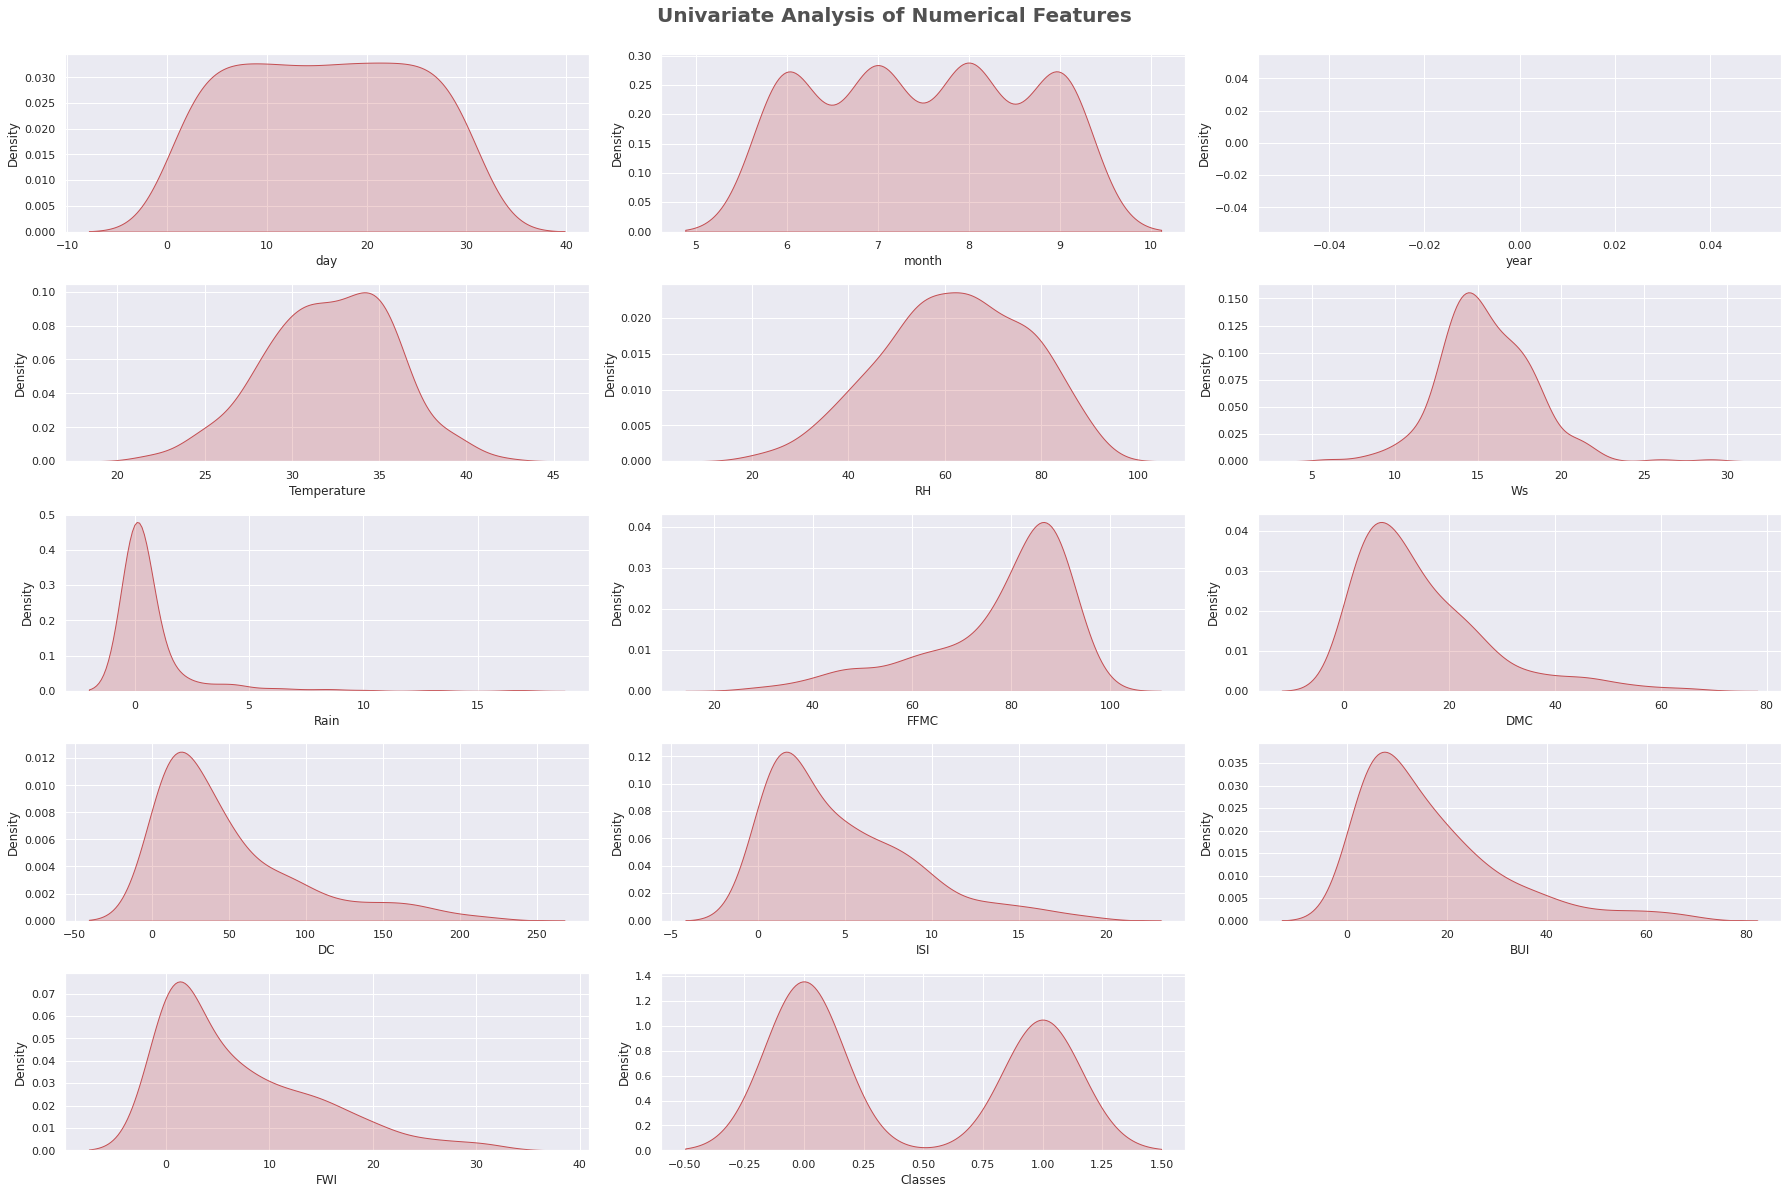

In [68]:
plt.figure(figsize=(25, 22))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(0, len(df.columns)):
  plt.subplot(7, 3, i+1)
  sns.kdeplot(x=df[df.columns[i]],shade=True, color='r')
  plt.xlabel(df.columns[i])
  plt.tight_layout()

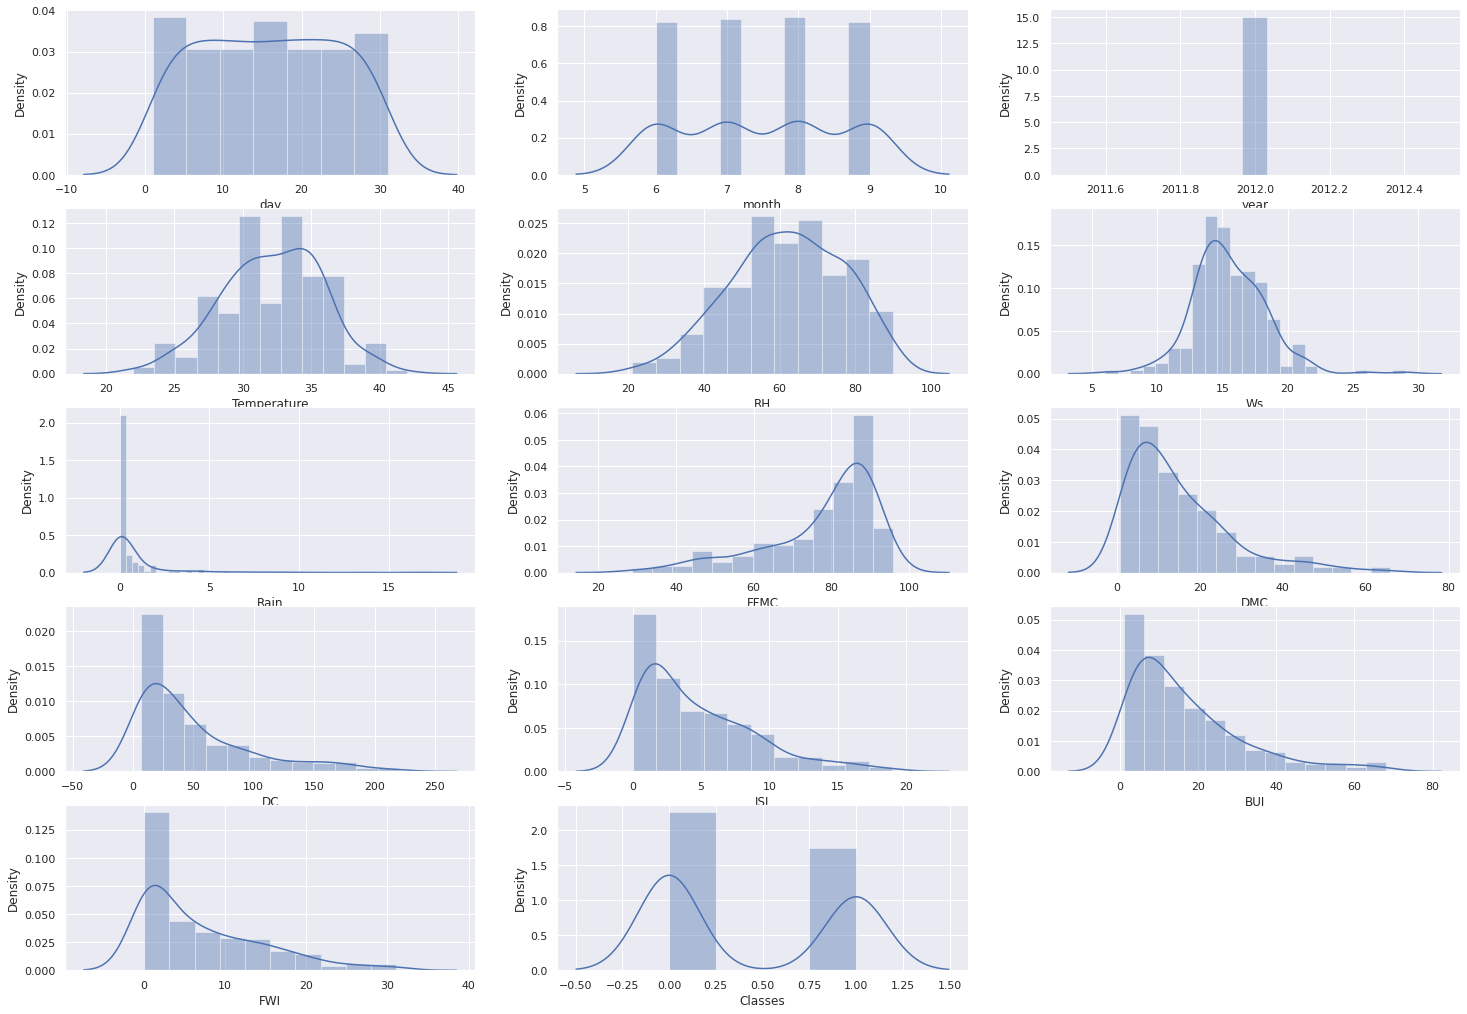

In [69]:
plt.figure(figsize=(25,25))
plotnumber = 1

for column in df:
  if plotnumber <= 15:
    ax = plt.subplot(7,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column)
  plotnumber+=1
plt.show()

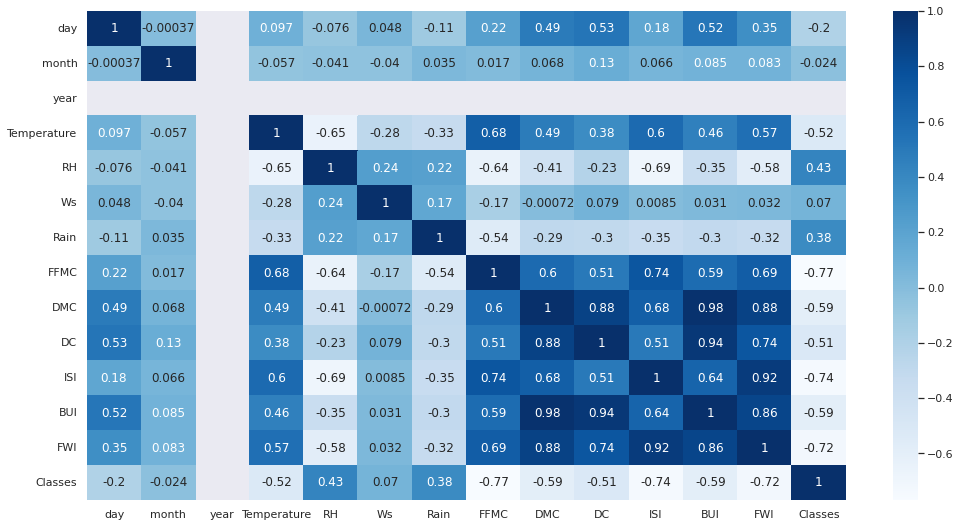

In [70]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(17,9))
sns.heatmap(df.corr(), cmap='Blues',annot = True)

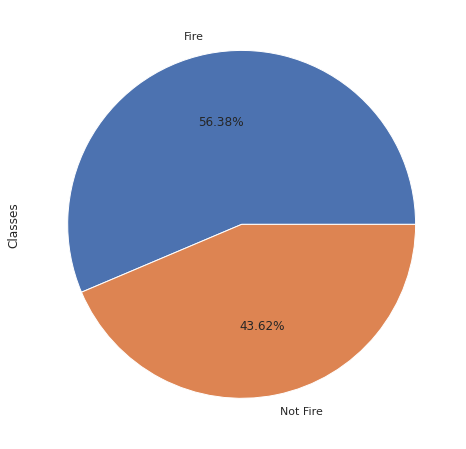

In [71]:
classes_labels=['Fire','Not Fire']
plt.figure(figsize=(8,8))
df['Classes'].value_counts().plot(kind='pie',autopct='%0.2f%%',labels=classes_labels)
plt.show()

In [72]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,0
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,1


In [73]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [74]:
df.drop(columns = ["year"],axis=1,inplace = True)

In [75]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1


**Split Independent and Dependent Feature**

In [76]:
X = df.drop(columns = ["Classes"],axis = 1)
y = df["Classes"]

In [77]:
X.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [78]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int64

In [86]:
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

In [87]:
X_Scaled

array([[-1.67279579, -1.35016751, -0.87065469, ..., -0.83035573,
        -0.93601155, -0.88015863],
       [-1.55947285, -1.35016751, -0.87065469, ..., -0.90272026,
        -0.90079808, -0.8936262 ],
       [-1.44614991, -1.35016751, -1.69925426, ..., -1.07157084,
        -0.98531039, -0.93402893],
       ...,
       [ 1.38692352,  1.34646842, -1.42305441, ..., -1.04744933,
        -0.93601155, -0.92056135],
       [ 1.50024646,  1.34646842, -2.25165398, ..., -0.73386968,
        -0.81628577, -0.85322348],
       [ 1.6135694 ,  1.34646842, -2.25165398, ..., -0.85447724,
        -0.83741385, -0.88015863]])

In [88]:
variables = X_Scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [89]:
vif

,VIF,Features
0,1.487120,day
1,1.088510,month
2,2.415204,Temperature
3,2.764923,RH
4,1.312931,Ws
5,1.551373,Rain
6,4.120286,FFMC
7,76.480443,DMC
8,25.363045,DC
9,23.122783,ISI


**Split Train Data and Test Data**

In [90]:
#split the data into training and testing

X_train,X_test,y_train,y_test = train_test_split(X_Scaled,y,test_size=0.2,random_state = 10)

In [91]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)
     

Shape of X Train:  (194, 12)
Shape of X Test:  (49, 12)
Shape of y Train:  (194,)
Shape of y Test:  (49,)


**Model Building**

In [92]:
def ML_model(model):
  #model = LogisticRegression()
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)
# print(y_pred)

# Accuracy,F1_Score, Precision_Score,Recall_Score
  print("Confusion Matrix :\n ",(confusion_matrix(y_test,y_pred)))
  print()
  print("Accuracy_Score: ", round(accuracy_score(y_test,y_pred)*100,3),"%")
  print()
  print("F1 Score: ", (f1_score(y_test,y_pred)))
  print("Precision Score: ", (precision_score(y_test,y_pred)))
  print("Recall Score :", (recall_score(y_test,y_pred)))
  #print("AUC Score :", roc_auc_score(y_test,y_pred))
  print("\n")
#Entire Report of the Model
  print("Entire Report of the Model: \n", (classification_report(y_test,y_pred)))
  plt.show()

**Implementing Machine Learning Algorithm**

In [93]:
classifier = ML_model(LogisticRegression())
classifier

Confusion Matrix :
  [[27  2]
 [ 0 20]]

Accuracy_Score:  95.918 %

F1 Score:  0.9523809523809523
Precision Score:  0.9090909090909091
Recall Score : 1.0


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       0.91      1.00      0.95        20

    accuracy                           0.96        49
   macro avg       0.95      0.97      0.96        49
weighted avg       0.96      0.96      0.96        49



In [94]:
ML_model(DecisionTreeClassifier())

Confusion Matrix :
  [[27  2]
 [ 1 19]]

Accuracy_Score:  93.878 %

F1 Score:  0.9268292682926829
Precision Score:  0.9047619047619048
Recall Score : 0.95


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95        29
           1       0.90      0.95      0.93        20

    accuracy                           0.94        49
   macro avg       0.93      0.94      0.94        49
weighted avg       0.94      0.94      0.94        49



In [95]:
ML_model(RandomForestClassifier())

Confusion Matrix :
  [[27  2]
 [ 1 19]]

Accuracy_Score:  93.878 %

F1 Score:  0.9268292682926829
Precision Score:  0.9047619047619048
Recall Score : 0.95


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95        29
           1       0.90      0.95      0.93        20

    accuracy                           0.94        49
   macro avg       0.93      0.94      0.94        49
weighted avg       0.94      0.94      0.94        49



**References:**

https://github.com/aarpitdubey/algerian-forest-fire-detection